# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 K 보험사의 직원입니다. K 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

---------------------------------------------------------------------------------------------
# **0. 환경설정(경로설정)**
* 세부 요구사항
    - 경로 설정 : 구글 colab
        * 구글 드라이브 바로 밑에 dxproject 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path
path = '/content/drive/MyDrive/dxproject/'

---------------------------------------------------------------------------------------------
#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.

In [ ]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 등 임포트 하기

import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
# 한글 세팅

# 1. 나눔고딕 폰트 설치
!apt-get -qq update
!apt-get -qq install -y fonts-nanum

# 2. 런타임에 폰트 캐시 갱신
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 3. 폰트 이름 확인 후 설정
nanum_font_name = fm.FontProperties(fname=font_files[0]).get_name()
print(f"설정된 폰트 이름: {nanum_font_name}")

# matplotlib에 폰트 반영
mpl.rc('font', family=nanum_font_name)
mpl.rcParams['axes.unicode_minus'] = False

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
설정된 폰트 이름: NanumGothic


In [ ]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv(path+'customers_seg.csv')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [ ]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.
data.head()


,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [ ]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.
data.tail()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
11995,11996,1,계약자,고용,1,25.9851,0,기본,대학졸업,86451000,...,기혼,70,0,2,비방문,설계사독려,인터넷,245000,일반세단,중
11996,11997,3,피보험자,고용,0,3.4410,1,중급,대학졸업,25962000,...,미혼,80,0,1,자주방문,할인,자사영업,468000,일반세단,중
11997,11998,3,피보험자,무직,1,9.0576,0,중급,대학졸업,0,...,미혼,90,3,2,자주방문,할인,자사영업,977000,일반세단,중
11998,11999,4,계약자,고용,1,8.3472,0,중급,대학졸업,26366000,...,기혼,100,0,3,비방문,포인트,자사영업,854000,일반세단,대
11999,12000,3,피보험자,무직,1,2.8971,0,중급,대학졸업,0,...,미혼,80,0,1,자주방문,없음,콜센터,456000,컴팩트카,중


In [ ]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)
data.shape


(12000, 21)

In [ ]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [ ]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자
data.describe()


,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [ ]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns


Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 탐색해 보자!

In [ ]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
analyze_cols = ['AGE', '고용상태', '교육수준', '상품타입', '거주지사이즈', '자동차']
data[analyze_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
 5   자동차     12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [ ]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

,proportion
AGE,
1,0.121167
2,0.128167
3,0.397917
4,0.260333
5,0.088083
6,0.004333


<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

In [ ]:
# 고령층의 보험 가입 비율이 상대적으로 매우 낮은 편이다(60~70대)
# 장기적으로 충성고객층이 될 수 있는 20~30대의 비율은 4~50대에 비해 낮은 편이다

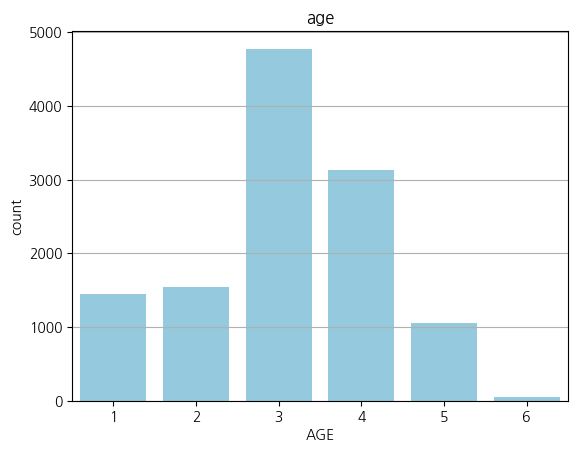

In [ ]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data, color = 'skyblue')
plt.title('age')
plt.grid(axis = 'y')
plt.show()

### 2) 고용상태

In [ ]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.
data['고용상태'].value_counts()


,count
고용상태,
고용,7518
무직,3028
휴직,1094
FALSE,360


In [ ]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data['고용상태'].value_counts(normalize=True)


,proportion
고용상태,
고용,0.626500
무직,0.252333
휴직,0.091167
FALSE,0.030000


In [ ]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

# False 값은 결측치로 예상하여 무직으로 추정?

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


In [ ]:
# 고용상태인 고객은 62% 현재 비고용 상태인 고객은 38%의 비율로 추정할 수 있다

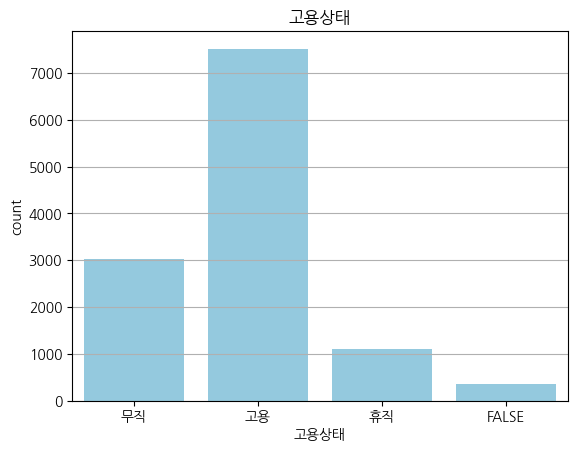

In [ ]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x = '고용상태', data = data, color = 'skyblue')
plt.title('고용상태')
plt.grid(axis='y')
plt.show()

### 3) 교육수준

In [ ]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.
data['교육수준'].value_counts()


,count
교육수준,
대학졸업,7105
고졸이하,3477
석사,979
박사,439


In [ ]:
#[문제 13] 위 결과에 대해 비율로 계산해보자.
data['교육수준'].value_counts(normalize= True)


,proportion
교육수준,
대학졸업,0.592083
고졸이하,0.289750
석사,0.081583
박사,0.036583


<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 약 71%의 고객이 대학 졸업 이상의 교육 수준을 가지고 있다
# 고객 중 고졸 이하의 비율이 상대적으로 낮다

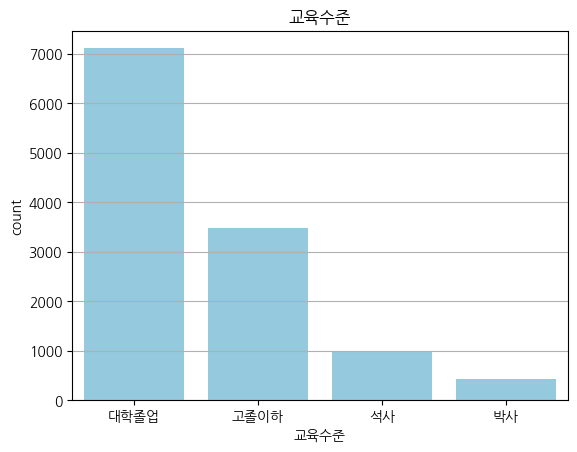

In [ ]:
#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!

sns.countplot(x = '교육수준', data = data, color = 'skyblue')
plt.grid(axis = 'y')
plt.title('교육수준')
plt.show()

### 4) 상품타입

In [ ]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.
data['상품타입'].value_counts(normalize = True)


,proportion
상품타입,
기본,0.606500
중급,0.303917
고급,0.089583


<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 기본형 상품 타입이 과반수 이상의 비율을 차지하고 있다(약 60%)
# 이후 데이터 분석을 통해 소득수준, 교육수준 등과의 상관관계를 파악해보아야 할 것으로 보인다

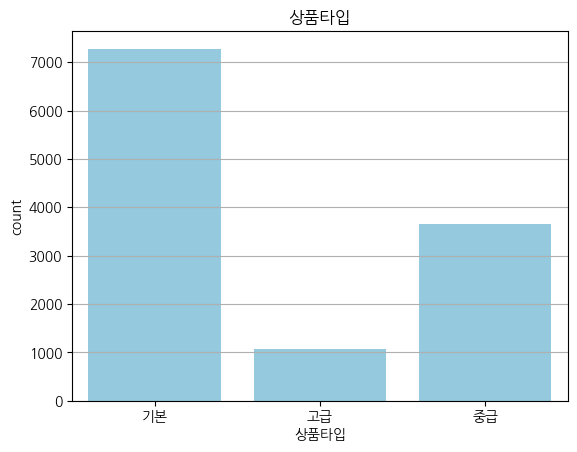

In [ ]:
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x = '상품타입', data = data, color = 'skyblue')
plt.grid(axis = 'y')
plt.title('상품타입')
plt.show()


### 5) 거주지사이즈

In [ ]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.
data['거주지사이즈'].value_counts(normalize = True)


,proportion
거주지사이즈,
중,0.701917
소,0.194333
대,0.103750


<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 거주지 상태중 중간에 속하는 중 레벨의 고객들의 보험 계약 비율이 높다
# '소' 레벨 보다 '대' 레벨 고객의 비율이 더 낮다
# 거주지의 레벨이 올라갈수록 보험 가입의 필요성이 더 낮을 수 있다?

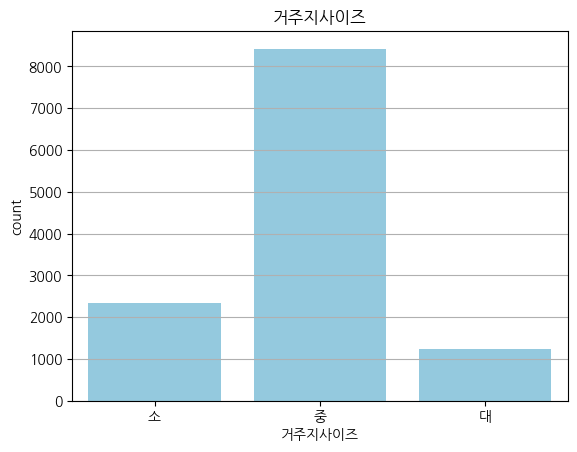

In [ ]:
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x = '거주지사이즈', data= data, color = 'skyblue')
plt.title('거주지사이즈')
plt.grid(axis='y')
plt.show()

### 6) 자동차

In [ ]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.
data['자동차'].value_counts(normalize=True)


,proportion
자동차,
일반세단,0.506167
컴팩트카,0.207000
SUV,0.194667
스포츠카,0.054333
고급차,0.037833


<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 일반 세단의 비율이 가장 높다.
# 스포츠카, 고급차 같은 가격이 높은 자동차를 소유하고 있는 고객의 비율이
# 상대적으로 낮은 것으로 보아 고소득층의 보험 가입 비율이 낮다고 추정할 수 있다

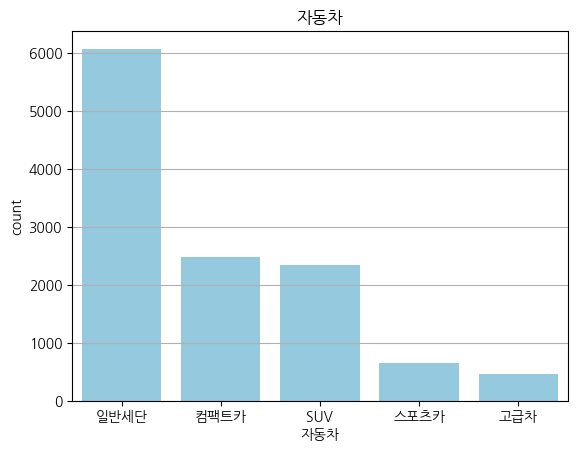

In [ ]:
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
sns.countplot(x = '자동차', data= data, color = 'skyblue')
plt.title('자동차')
plt.grid(axis='y')
plt.show()


## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 histplot 을 통해서 탐색해 보자

In [ ]:
data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [ ]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)

major_cols = ['Willingness to pay/Stay','소득','월 납입액','타 상품 보유 현황','총지불금액']
data[major_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


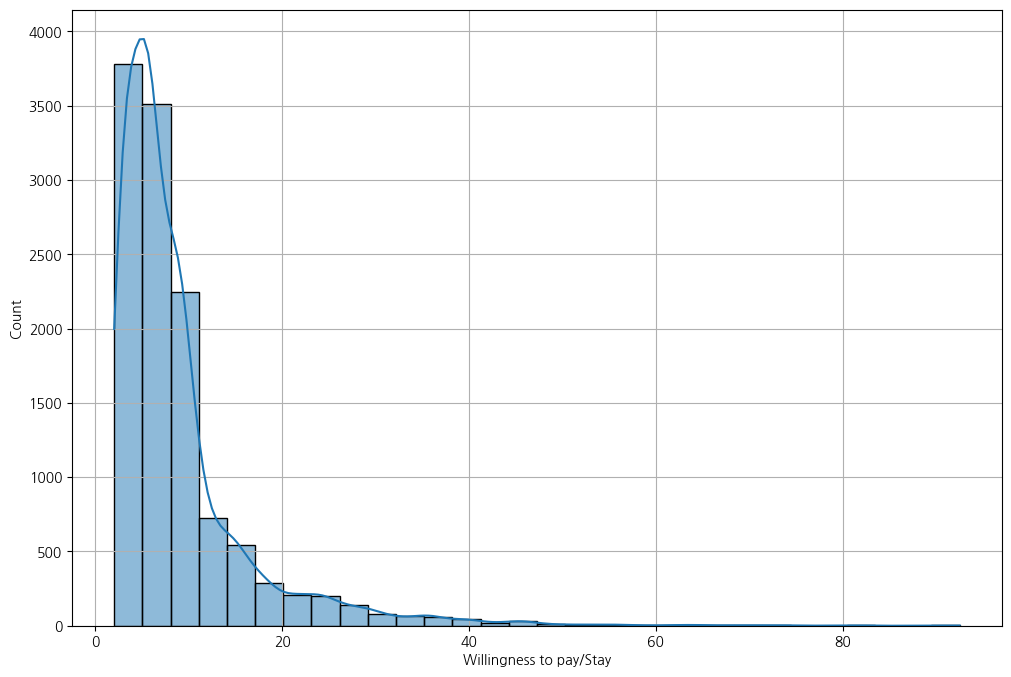

In [ ]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [ ]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)

data.describe() # mean :  8.859478

,CID,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,6000.50000,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,3464.24595,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.00000,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3000.75000,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,6000.50000,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,9000.25000,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,12000.00000,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

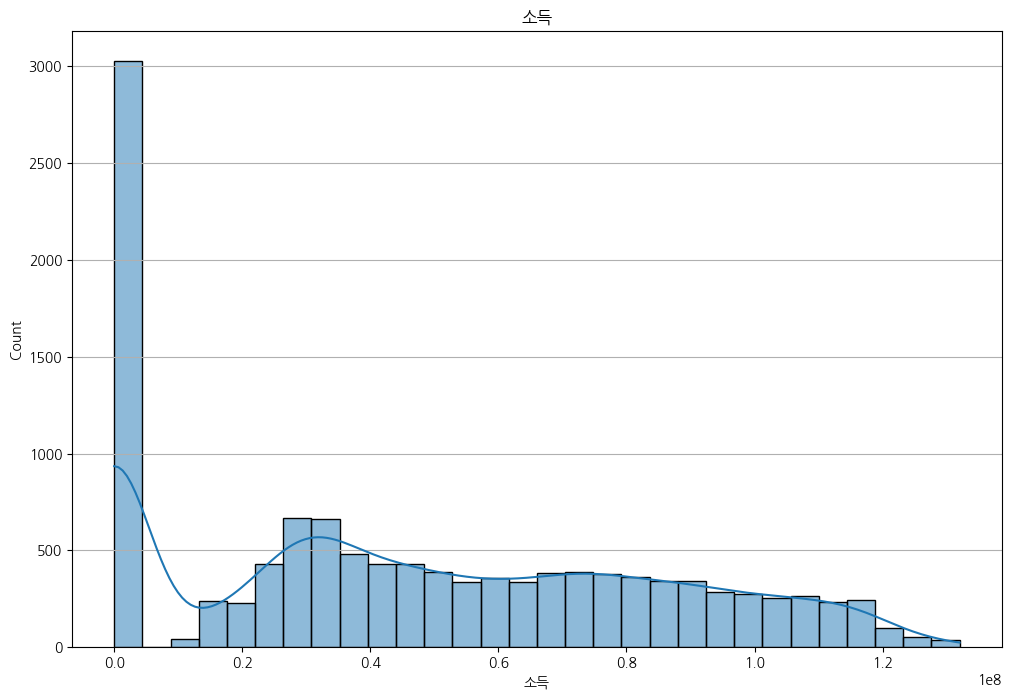

In [ ]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12,8))
sns.histplot(x = '소득', data = data, bins = 30, kde=True)
plt.title('소득')
plt.grid(axis='y')
plt.show()


<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
data['소득'].describe()

,소득
count,1.200000e+04
mean,4.641737e+07
std,3.736221e+07
min,0.000000e+00
25%,0.000000e+00
50%,4.186240e+07
75%,7.664150e+07
max,1.320209e+08


In [ ]:
# 소득이 없는 고객의 비중이 높은편이다.(피보험자와 계약자의 비율 또한 확인해봐야 할 것)
# 분포곡선은 완만한 곡선을 이루고 있다.
# 전체적인 소득수준에 대한 분포가 고르게 이루어져 있다.

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

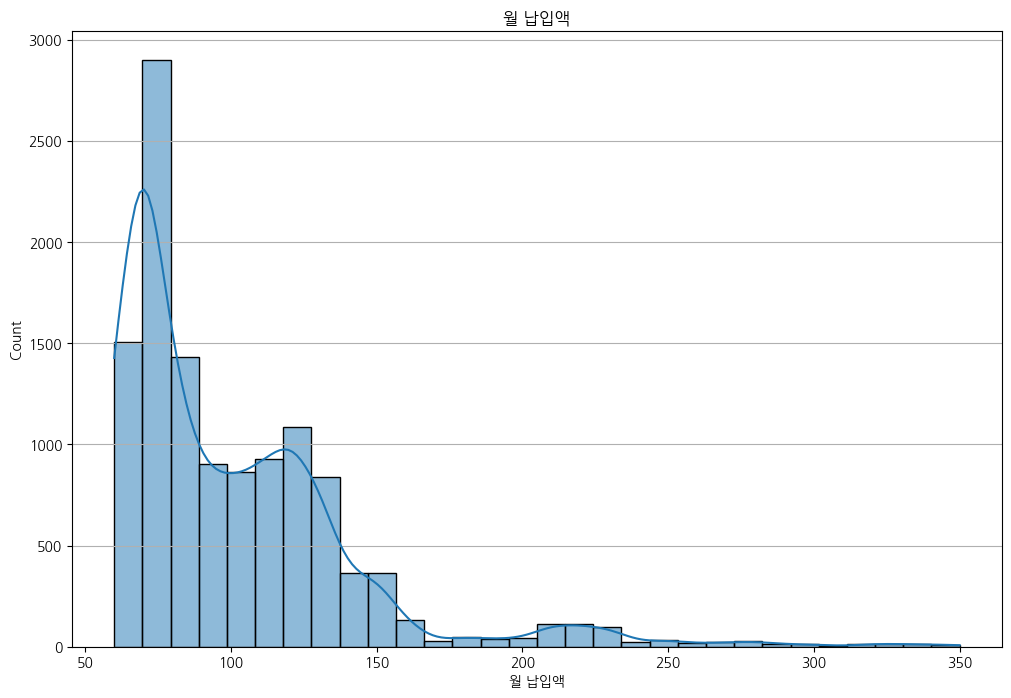

In [ ]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자

plt.figure(figsize=(12,8))
sns.histplot(x='월 납입액', data=data,bins=30, kde = True)
plt.title('월 납입액')
plt.grid(axis='y')
plt.show()

In [ ]:
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
data['월 납입액'].describe()

,월 납입액
count,12000.000000
mean,100.065833
std,42.453750
min,60.000000
25%,70.000000
50%,90.000000
75%,120.000000
max,350.000000


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 월 납입액의 경우 평균값은 100,000 KRW 이다
# 60,000 ~ 80,000 KRW 를 납입하고 있는 고객의 비중이 높은 편이다
# 상대적으로 고액을 납입하는 고객의 비중은 매우 낮은 편이다.

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 범주 비율로 확인해보기

In [ ]:
data.columns

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [ ]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.
data['타 상품 보유 현황'].value_counts(normalize= True)


,proportion
타 상품 보유 현황,
1,0.356917
4이상,0.262917
2,0.251417
3,0.128750


<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 1개의 상품만을 보유한 비율이 약 35.6%로 높은 편이다
# 4개 이상을 보유하고 있는 고객의 비율 또한 약 26%로 낮지 않은 비율을 보이고 있다
# 대부분의 고객이 1가지의 상품보다는 다른 서비스를 함께 사용하고 있는것으로 보인다(약 64%)

### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

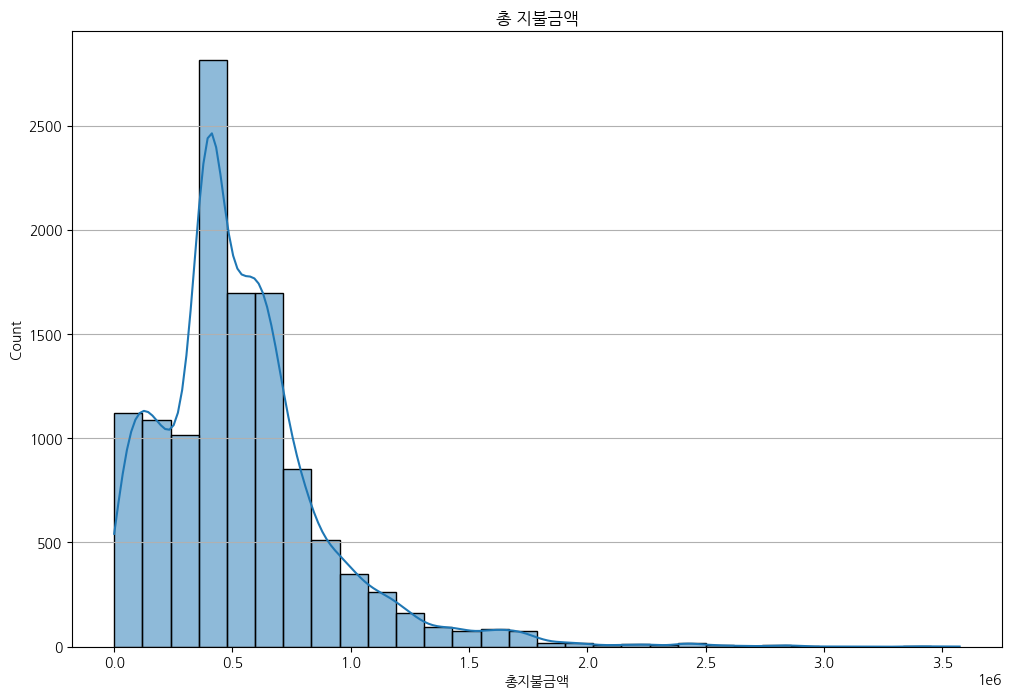

In [ ]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
plt.figure(figsize = (12,8))
sns.histplot(x = '총지불금액', data = data, bins = 30, kde = True)
plt.title('총 지불금액')
plt.grid(axis = 'y')
plt.show()

In [ ]:
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)

data['총지불금액'].describe()

,총지불금액
count,1.200000e+04
mean,5.355854e+05
std,3.587993e+05
min,0.000000e+00
25%,3.360000e+05
50%,4.740000e+05
75%,6.790000e+05
max,3.573000e+06


<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# (주석으로 적기)
# 400,000 ~ 700,000 KRW 의 보험금을 지급받은 고객의 비중이 높다
# 평균적으로 535000 KRW 의 보험금을 지불받았다

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!